<div class="alert alert-block alert-success">
    
# EDA Projects: Pizza Restaurant Sales
    
 👨‍🏫 **David Wood**      
 📅 **[18-Apr-2023]**  
 

</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA-Projects:-Pizza-Restaurant-Sales" data-toc-modified-id="EDA-Projects:-Pizza-Restaurant-Sales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA Projects: Pizza Restaurant Sales</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Import-modules-and-data-👨‍💻" data-toc-modified-id="Import-modules-and-data-👨‍💻-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import modules and data 👨‍💻</a></span></li><li><span><a href="#Data-Inspection-🔍📊" data-toc-modified-id="Data-Inspection-🔍📊-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Inspection 🔍📊</a></span></li><li><span><a href="#Merging-Datasets-🔀" data-toc-modified-id="Merging-Datasets-🔀-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Merging Datasets 🔀</a></span></li><li><span><a href="#EDA-🧐" data-toc-modified-id="EDA-🧐-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>EDA 🧐</a></span><ul class="toc-item"><li><span><a href="#Univariate-and-Bivariate-Analysis" data-toc-modified-id="Univariate-and-Bivariate-Analysis-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Univariate and Bivariate Analysis</a></span></li></ul></li><li><span><a href="#Insights-and-Conclusions-🕵️‍♂️" data-toc-modified-id="Insights-and-Conclusions-🕵️‍♂️-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Insights and Conclusions 🕵️‍♂️</a></span></li></ul></div>

<div class="alert alert-block alert-danger">

# Summary
    
📈📉🍕 **A year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas served, with additional details on the type, size, quantity, price, and ingredients.** 📈📉🍕 <br><br>
    
*Data Dictionary:* <br><br>

| Table     | Field          | Description                                                         |
|-----------|----------------|---------------------------------------------------------------------|
| orders    | order_id       | Unique identifier for each order placed by a table |
| orders    | date           | Date the order was placed (entered into the system prior to cooking & serving) |
| orders	| time	         | Time the order was placed (entered into the system prior to cooking & serving) |
| order_details | order_details_id | Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases) |
| order_details | order_id | Foreign key that ties the details in each order to the order itself |
| order_details | pizza_id | Foreign key that ties the pizza ordered to its details, like size and price |
| order_details | quantity | Quantity ordered for each pizza of the same type and size |
| pizzas | pizza_id | Unique identifier for each pizza (constituted by its type and size) |
| pizzas | pizza_type_id | Foreign key that ties each pizza to its broader pizza type |
| pizzas | size | Size of the pizza (Small, Medium, Large, X Large, or XX Large) |
| pizzas | price | Price of the pizza in USD |
| pizza_types | pizza_type_id | Unique identifier for each pizza type |
| pizza_types | name | Name of the pizza as shown in the menu |
| pizza_types | category | Category that the pizza fall under in the menu (Classic, Chicken, Supreme, or Veggie) |
| pizza_types | ingredients | Comma-delimited ingredients used in the pizza as shown in the menu (they all include Mozzarella Cheese, even if not specified; and they all include Tomato Sauce, unless another sauce is specified) |
    
</div>

#  Import modules and data 👨‍💻

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use("ggplot") # styling the charts

from datetime import datetime

In [2]:
# import os
# os.getcwd()

In [3]:
order_details = pd.read_csv('pizza_sales/order_details.csv')
orders = pd.read_csv('pizza_sales/orders.csv', parse_dates = ['date'])
pizza_types = pd.read_csv('pizza_sales/pizza_types.csv', encoding='latin1')
pizzas = pd.read_csv('pizza_sales/pizzas.csv')

In [4]:
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [5]:
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [6]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [7]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


#  Data Inspection 🔍📊 

**As we have 4 separate datasets, we will conduct some routine data inspection on each individually before merging all datasets into one single location**

*Data Inspect*

In [8]:
order_details.info(); orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 500.5+ KB


In [9]:
pizza_types.info(); pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


*Dataset Size*

In [10]:
print('order_details is', order_details.shape)
print('orders is', orders.shape)
print('pizza_types is', pizza_types.shape)
print('pizzas is', pizzas.shape)

order_details is (48620, 4)
orders is (21350, 3)
pizza_types is (32, 4)
pizzas is (96, 4)


*Missing Values Check*

In [11]:
print('order_details has:', '\n', order_details.isna().sum(), '\n')
print('orders has:', '\n', orders.isna().sum(), '\n')
print('pizza_types has:', '\n', pizza_types.isna().sum(), '\n')
print('pizzas has:', '\n', pizzas.isna().sum(), '\n')

order_details has: 
 order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64 

orders has: 
 order_id    0
date        0
time        0
dtype: int64 

pizza_types has: 
 pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64 

pizzas has: 
 pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64 



*Duplicated Rows Check*

In [12]:
print('order_details has', order_details.duplicated().sum())
print('orders has', orders.duplicated().sum())
print('pizza_types has', pizza_types.duplicated().sum())
print('pizzas has', pizzas.duplicated().sum())

order_details has 0
orders has 0
pizza_types has 0
pizzas has 0


# Merging Datasets 🔀

In [13]:
# Merging the datasets into one to work the analysis on it
df = pd.merge(order_details, orders, on='order_id')
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40


In [14]:
df = pd.merge(df, pizzas, on='pizza_id')
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25


In [15]:
df = pd.merge(df, pizza_types, on='pizza_type_id')
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [16]:
df = df.sort_values(by='order_details_id').reset_index()
df.head()

,index,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2370,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,4786,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,6145,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,7994,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [17]:
df = df.drop(columns=['index'])
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [18]:
df.isna().sum()
df.duplicated().sum()
df.shape

(48620, 12)

*Data Summary of Merged Dataset*

In [19]:
df.describe()

,order_details_id,order_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132
std,14035.529381,6180.119770,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000
max,48620.000000,21350.000000,4.000000,35.950000


In [20]:
df.describe(include = object)

,pizza_id,time,pizza_type_id,size,name,category,ingredients
count,48620,48620,48620,48620,48620,48620,48620
unique,91,16382,32,5,32,4,32
top,big_meat_s,12:32:00,classic_dlx,L,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
freq,1811,26,2416,18526,2416,14579,2416


# EDA 🧐

*Firstly we will add new fields for day of week, day and month (ignoring year in this case, as all data is from 2015)*

In [21]:
df.insert(6, 'weekday', df['date'].dt.day_name())
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,weekday,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,Thursday,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,Thursday,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,Thursday,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,Thursday,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,Thursday,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [22]:
df.insert(7, 'day', df['date'].dt.day)
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,weekday,day,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,Thursday,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,Thursday,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,Thursday,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,Thursday,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,Thursday,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [23]:
df.insert(8, 'month', df['date'].dt.month_name())
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,weekday,day,month,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,Thursday,1,January,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,Thursday,1,January,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,Thursday,1,January,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,Thursday,1,January,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,Thursday,1,January,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


*Additionally, we can also add a new column for total spend per order details id (i.e. per row)*

In [24]:
df.rename(columns ={'price':'price_per_pizza'},inplace = True)

In [25]:
df.insert(12, 'total_price', df['quantity'] * df['price_per_pizza'])
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,weekday,day,month,pizza_type_id,size,price_per_pizza,total_price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,Thursday,1,January,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,Thursday,1,January,classic_dlx,M,16.00,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,Thursday,1,January,five_cheese,L,18.50,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,Thursday,1,January,ital_supr,L,20.75,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,Thursday,1,January,mexicana,M,16.00,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [26]:
# df.loc[df['quantity'] > 1]

## Univariate and Bivariate Analysis

*How many customers do we have each day?*

In [27]:
print('We have an average of', round(orders['date'].value_counts().mean(), 2), 'customers each day.')

We have an average of 59.64 customers each day.


In [28]:
orders['date'].value_counts().head()

2015-11-27    115
2015-11-26    113
2015-10-15    107
2015-07-04    105
2015-05-15     94
Name: date, dtype: int64

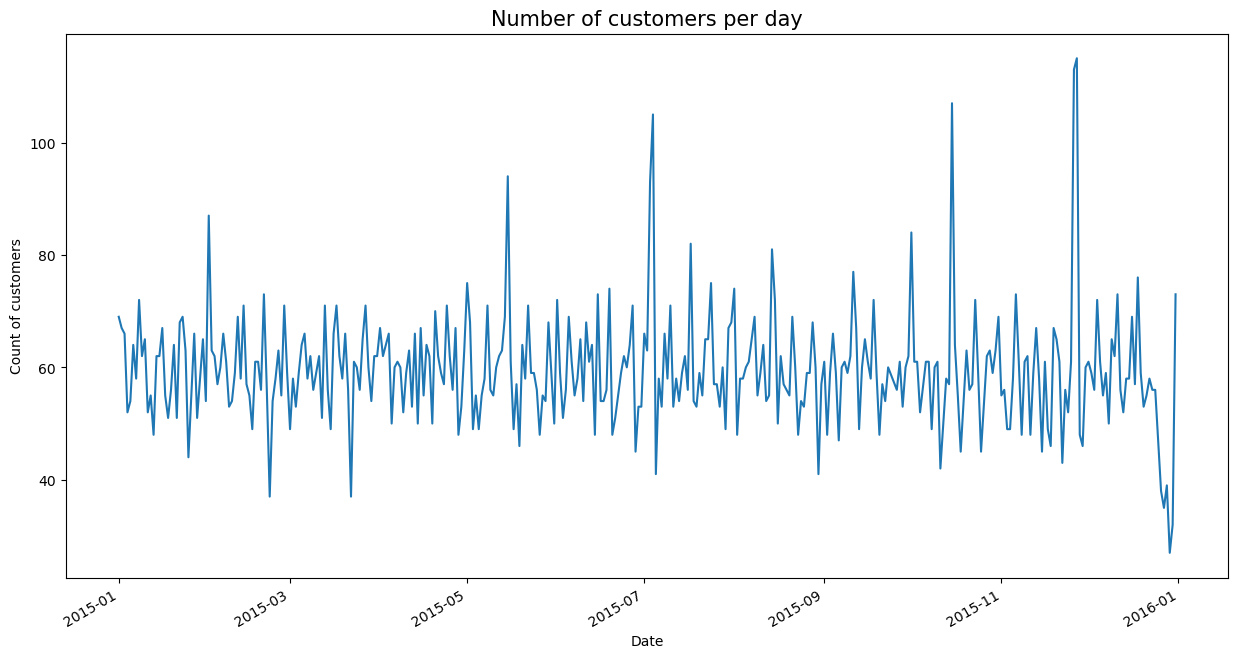

In [29]:
plt.subplots(figsize= (15,8))

orders['date'].value_counts().plot(kind='line')

plt.title('Number of customers per day', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Count of customers')

plt.show()

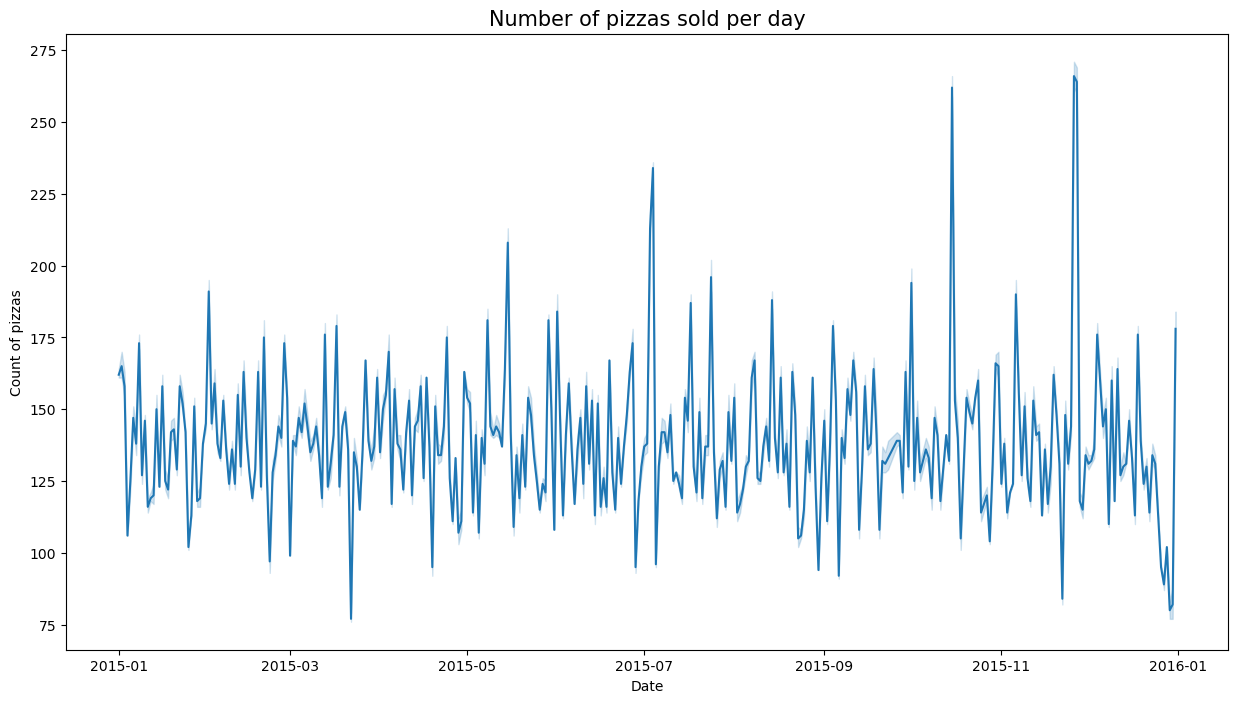

In [30]:
plt.subplots(figsize= (15,8))

sns.lineplot(data=df, x='date', y='quantity', estimator='sum')

plt.title('Number of pizzas sold per day', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Count of pizzas')

plt.show()

*Are there any peak hours?*

In [31]:
orders['time'] = pd.to_datetime(orders['time'])
orders['hour'] = orders['time'].dt.hour

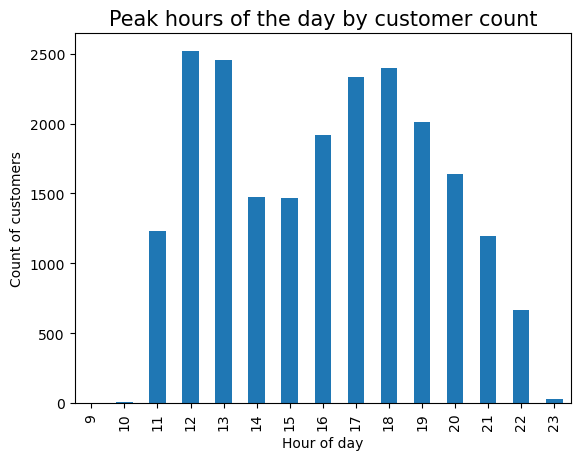

In [32]:
orders['hour'].sort_values().value_counts(sort=False).plot(kind='bar')

plt.title('Peak hours of the day by customer count', fontsize=15)
plt.xlabel('Hour of day')
plt.ylabel('Count of customers')

plt.show()

In [33]:
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour

In [34]:
# print('Number of pizzas sold by hour of the day:', '\n\n', df.groupby('hour')['quantity'].sum())

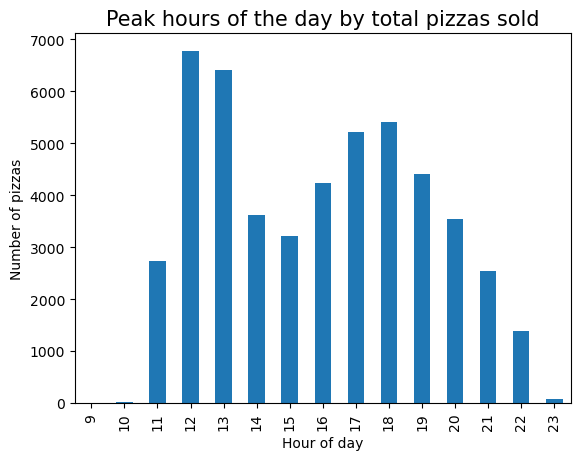

In [35]:
df.groupby('hour')['quantity'].sum().plot(kind='bar')

plt.title('Peak hours of the day by total pizzas sold', fontsize=15)
plt.xlabel('Hour of day')
plt.ylabel('Number of pizzas')

plt.show()

*Are there any peak days of the week?*

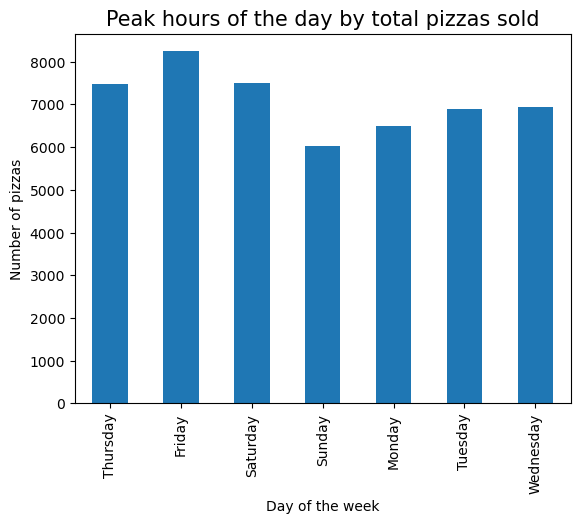

In [36]:
df.groupby('weekday', sort=False)['quantity'].sum().plot(kind='bar')

plt.title('Peak hours of the day by total pizzas sold', fontsize=15)
plt.xlabel('Day of the week')
plt.ylabel('Number of pizzas')

plt.show()

In [37]:
print('Friday is the busiest day of the week, with a total of', 
      df.loc[df['weekday'] == 'Friday']['quantity'].sum(), 'pizzas sold throughout the year')
print('An average number of', df.loc[df['weekday'] == 'Friday']['quantity'].sum() / 
      df.loc[df['weekday'] == 'Friday']['date'].nunique(), 'pizzas are sold on this day,', 
     'with average daily revenue of', (df.loc[df['weekday'] == 'Friday']['total_price'].sum() / 
      df.loc[df['weekday'] == 'Friday']['date'].nunique()).round(2))

Friday is the busiest day of the week, with a total of 8242 pizzas sold throughout the year
An average number of 164.84 pizzas are sold on this day, with average daily revenue of 2721.48


In [38]:
print('Sunday is the quietest day of the week, with a total of', 
      df.loc[df['weekday'] == 'Sunday']['quantity'].sum(), 'pizzas sold throughout the year')
print('An average number of', (df.loc[df['weekday'] == 'Sunday']['quantity'].sum() / 
      df.loc[df['weekday'] == 'Sunday']['date'].nunique()).round(2), 'pizzas are sold on this day,',
     'with average daily revenue of', (df.loc[df['weekday'] == 'Sunday']['total_price'].sum() / 
      df.loc[df['weekday'] == 'Sunday']['date'].nunique()).round(2))

Sunday is the quietest day of the week, with a total of 6035 pizzas sold throughout the year
An average number of 116.06 pizzas are sold on this day, with average daily revenue of 1907.76


*How many pizzas are sold on average each day? What is the average daily revenue?*

In [39]:
print('The average number of pizzas sold daily is', 
      (df['quantity'].sum() / df['date'].nunique()).round(2), 'per day')

The average number of pizzas sold daily is 138.47 per day


In [40]:
print('The average daily revenue is', (df['total_price'].sum() / df['date'].nunique()).round(2), 'per day')

The average daily revenue is 2284.53 per day


*How many pizzas are typically in an order? Do we have any bestsellers?*

In [41]:
print('Typically there are', round(df.groupby('order_id')['quantity'].sum().mean(), 1), 
      'pizzas on average per order')

Typically there are 2.3 pizzas on average per order


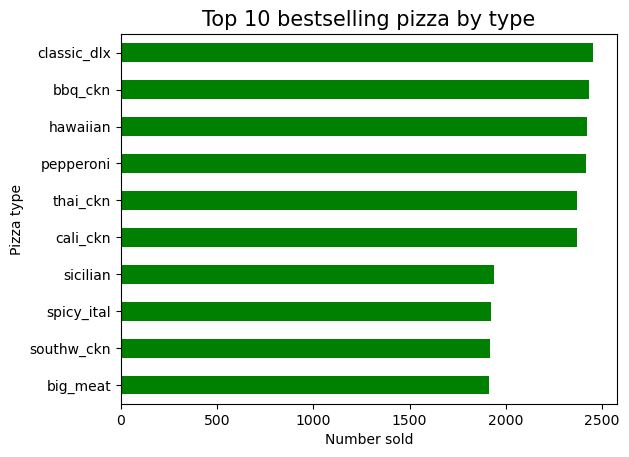

In [42]:
df.groupby('pizza_type_id')['quantity'].sum().nlargest(10).plot(kind='barh', color='green')

# setting title and axis labels
plt.title('Top 10 bestselling pizza by type', fontsize=15)
plt.xlabel('Number sold')
plt.ylabel('Pizza type')

# inverting axis to show in descending order
plt.gca().invert_yaxis()

plt.show()

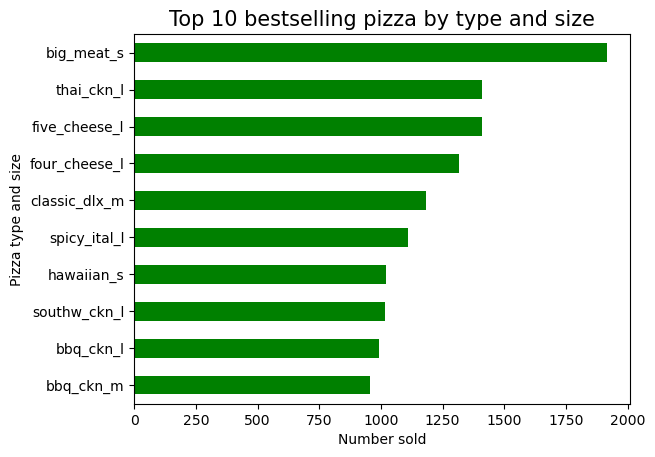

In [43]:
df.groupby('pizza_id')['quantity'].sum().nlargest(10).plot(kind='barh', color='green')

# setting title and axis labels
plt.title('Top 10 bestselling pizza by type and size', fontsize=15)
plt.xlabel('Number sold')
plt.ylabel('Pizza type and size')

# inverting axis to show in descending order
plt.gca().invert_yaxis()

plt.show()

*How much money did we make this year? Can we indentify any seasonality in the sales?*

In [44]:
print('The pizza restaurant grossed a total of', df['total_price'].sum(),
      'in sales during the whole of 2015')
print('A total of', df['quantity'].sum(), 'were sold during 2015')
print('This means that the average price per pizza sold is', round(
    df['total_price'].sum() / df['quantity'].sum(), 2), 'each')

The pizza restaurant grossed a total of 817860.05 in sales during the whole of 2015
A total of 49574 were sold during 2015
This means that the average price per pizza sold is 16.5 each


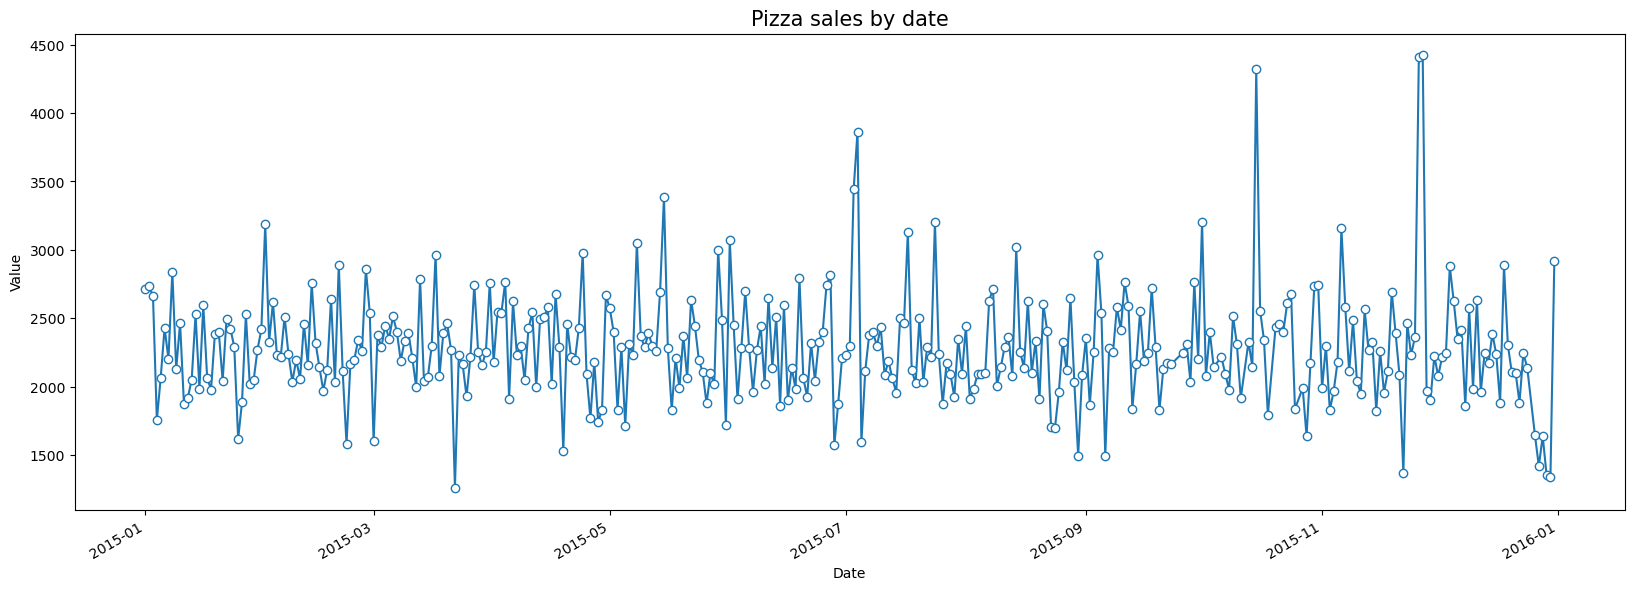

In [45]:
plt.subplots(figsize= (20,7))

df.groupby('date')['total_price'].sum().plot(kind = 'line', marker='o', markerfacecolor='white', fillstyle='full')

# setting title and axis labels
plt.title('Pizza sales by date', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()

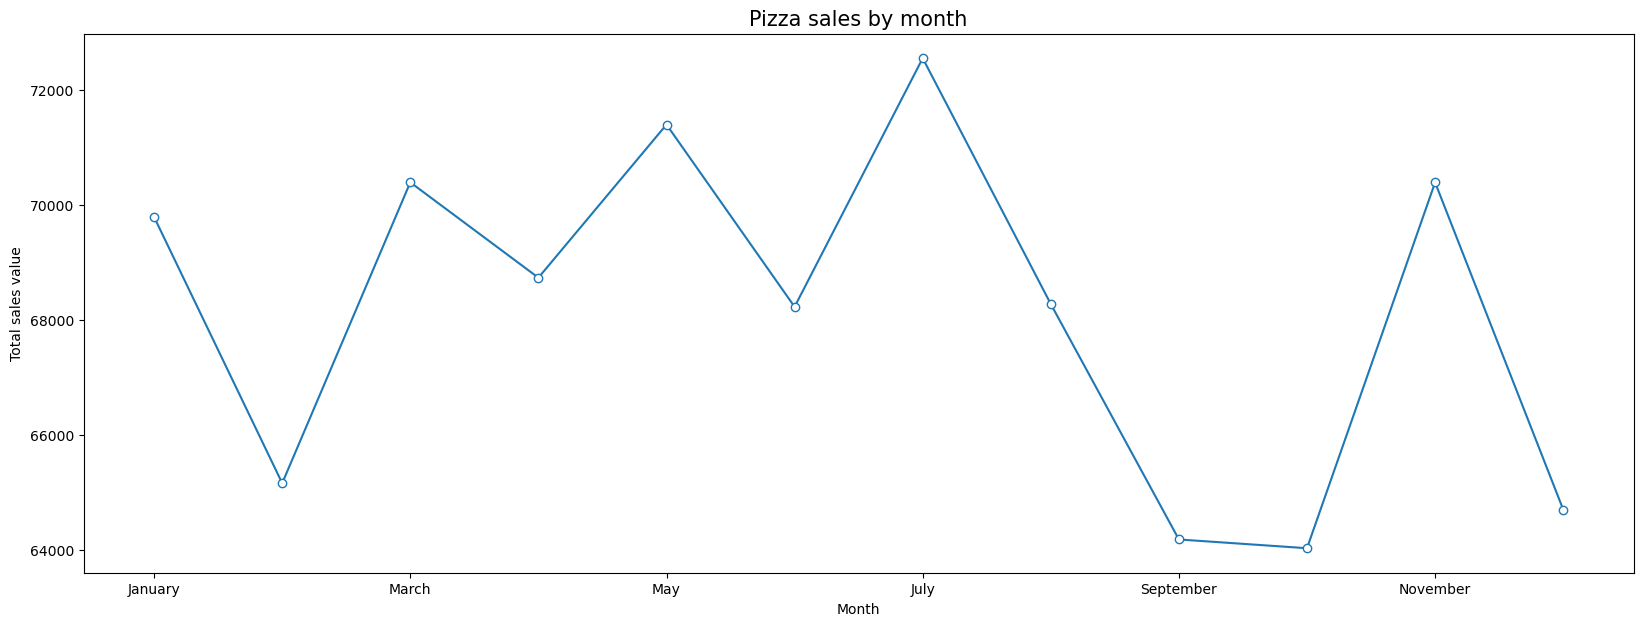

In [46]:
plt.subplots(figsize= (20,7))

df.groupby('month', sort=False)['total_price'].sum().plot(kind = 'line', marker='o', markerfacecolor='white', fillstyle='full')

# setting title and axis labels
plt.title('Pizza sales by month', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Total sales value')

plt.show()

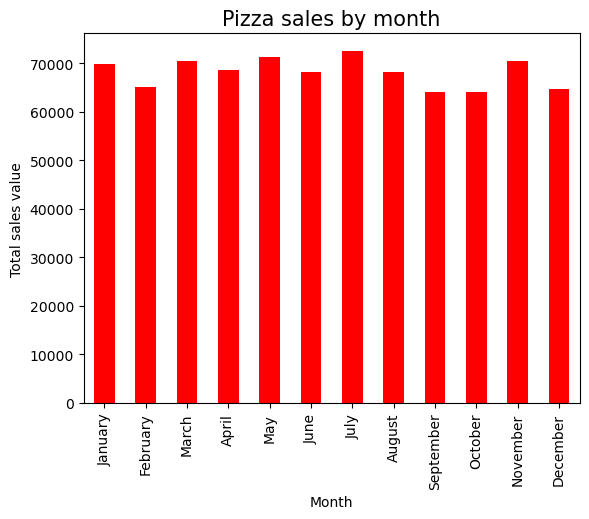

In [47]:
# Visualising as a bar chart rather than a line graph as above
df.groupby(df['date'].dt.strftime('%B'), sort=False)['total_price'].sum().plot(kind='bar', color='red')

# setting title and axis labels
plt.title('Pizza sales by month', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Total sales value')

plt.show()

*Are there any pizzas we should take off the menu, or any promotions we could leverage?*

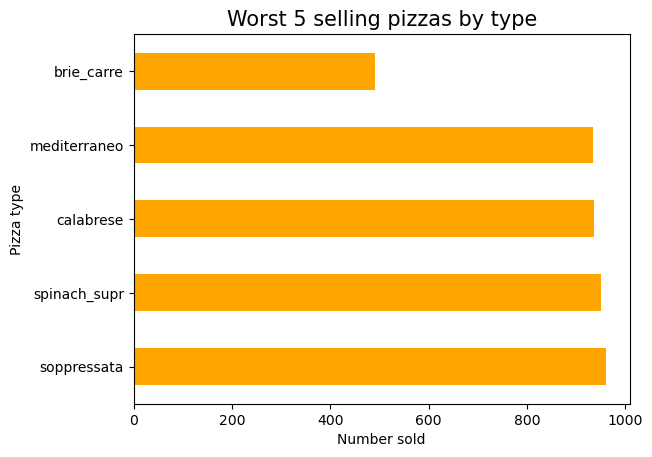

In [48]:
df.groupby('pizza_type_id')['quantity'].sum().nsmallest(5).plot(kind='barh', color='orange')

# setting title and axis labels
plt.title('Worst 5 selling pizzas by type', fontsize=15)
plt.xlabel('Number sold')
plt.ylabel('Pizza type')

# inverting axis to show in descending order
plt.gca().invert_yaxis()

plt.show()

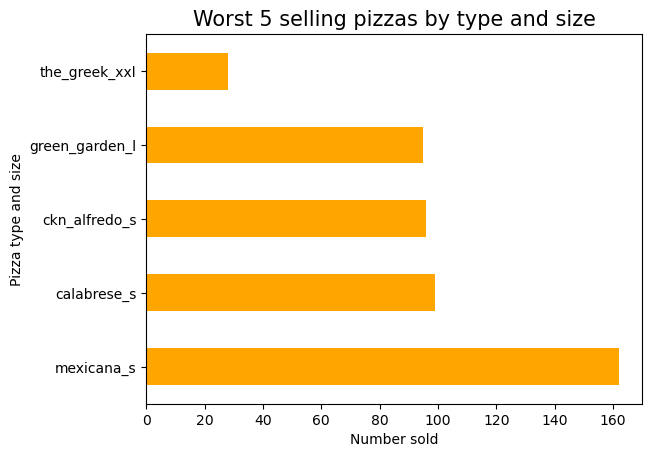

In [49]:
df.groupby('pizza_id')['quantity'].sum().nsmallest(5).plot(kind='barh', color='orange')

# setting title and axis labels
plt.title('Worst 5 selling pizzas by type and size', fontsize=15)
plt.xlabel('Number sold')
plt.ylabel('Pizza type and size')

# inverting axis to show in descending order
plt.gca().invert_yaxis()

plt.show()

In [50]:
# df.head()

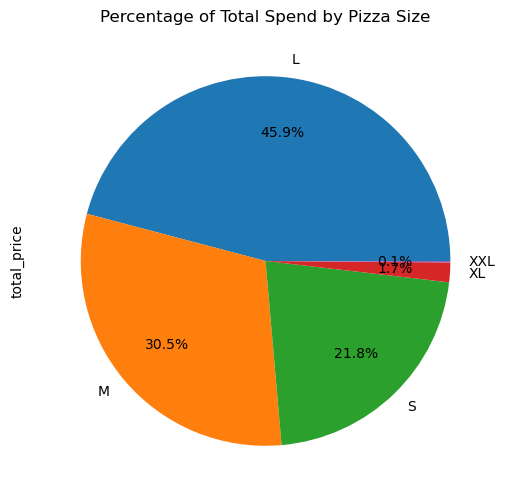

In [51]:
df.groupby('size')['total_price'].sum().plot(kind='pie', autopct='%1.1f%%', pctdistance=0.7, 
                                                figsize=(6, 6))

plt.title('Percentage of Total Spend by Pizza Size')

plt.show()

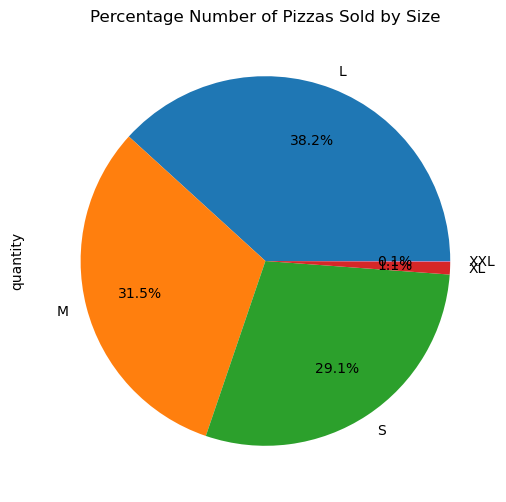

In [52]:
df.groupby('size')['quantity'].sum().plot(kind='pie', autopct='%1.1f%%', pctdistance=0.7, 
                                                figsize=(6, 6))

plt.title('Percentage Number of Pizzas Sold by Size')

plt.show()

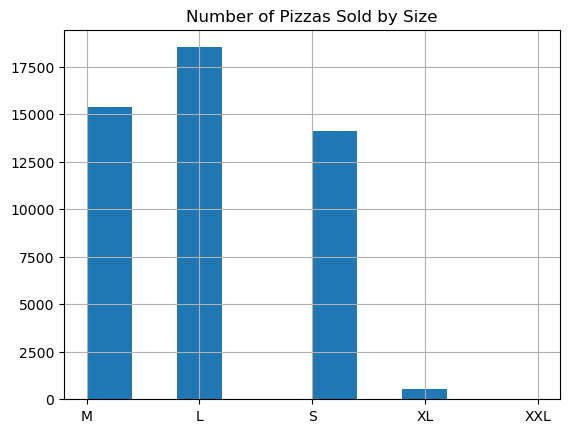

In [53]:
# plt.style.use("default") # using default style

df['size'].hist() # histogram plot of size

# setting title and axis labels
plt.title('Number of Pizzas Sold by Size')

plt.show()

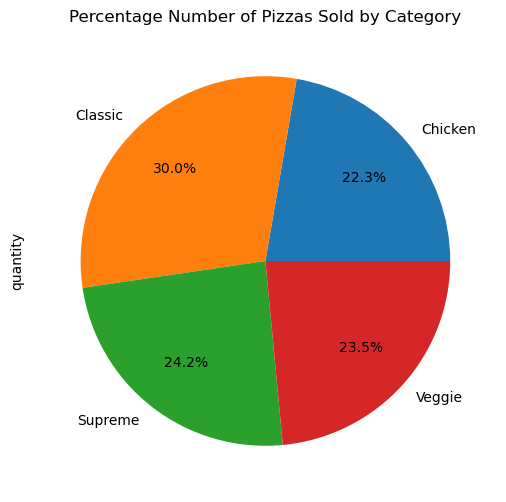

In [54]:
df.groupby('category')['quantity'].sum().plot(kind='pie', autopct='%1.1f%%', pctdistance=0.7, 
                                                figsize=(6, 6))

plt.title('Percentage Number of Pizzas Sold by Category')

plt.show()

*Which ingredients are most popularly used?*

In [55]:
df['ingredients'] = df['ingredients'].str.split(',')

In [56]:
df['ingredients'].value_counts()

[Pepperoni,  Mushrooms,  Red Onions,  Red Peppers,  Bacon]                                                  2416
[Barbecued Chicken,  Red Peppers,  Green Peppers,  Tomatoes,  Red Onions,  Barbecue Sauce]                  2372
[Sliced Ham,  Pineapple,  Mozzarella Cheese]                                                                2370
[Mozzarella Cheese,  Pepperoni]                                                                             2369
[Chicken,  Pineapple,  Tomatoes,  Red Peppers,  Thai Sweet Chilli Sauce]                                    2315
[Chicken,  Artichoke,  Spinach,  Garlic,  Jalapeno Peppers,  Fontina Cheese,  Gouda Cheese]                 2302
[Coarse Sicilian Salami,  Tomatoes,  Green Olives,  Luganega Sausage,  Onions,  Garlic]                     1887
[Capocollo,  Tomatoes,  Goat Cheese,  Artichokes,  Peperoncini verdi,  Garlic]                              1887
[Chicken,  Tomatoes,  Red Peppers,  Red Onions,  Jalapeno Peppers,  Corn,  Cilantro,  Chipotle S

In [57]:
#this code will be used to split each pizza ingredient into one by one to be able to specify the most used ingredient

ingredient = []
for i in df['ingredients']:
    ingredient.append(i)
ingred = []
for i in ingredient:
    ing = i
    ingred.append(ing)
alone = []
for t in ingred:
    for i in t:
        alone.append(i)

In [58]:
alone = pd.DataFrame(alone)
alone.value_counts()[0:25]

 Garlic               27422
 Tomatoes             23694
 Red Onions           19547
 Red Peppers          16284
Chicken                8443
 Mushrooms             8114
 Mozzarella Cheese     6605
 Pepperoni             6542
 Green Olives          6174
 Artichokes            5682
 Jalapeno Peppers      5643
Spinach                5239
 Green Peppers         5224
 Spinach               4773
 Feta Cheese           4748
 Pineapple             4685
Pepperoni              3758
Mozzarella Cheese      3728
 Asiago Cheese         3342
 Chipotle Sauce        3341
 Cilantro              3341
 Corn                  3341
 Goat Cheese           3301
Capocollo              3301
 Capocollo             3271
dtype: int64

*Some additional bivariate analysis on general relationships*

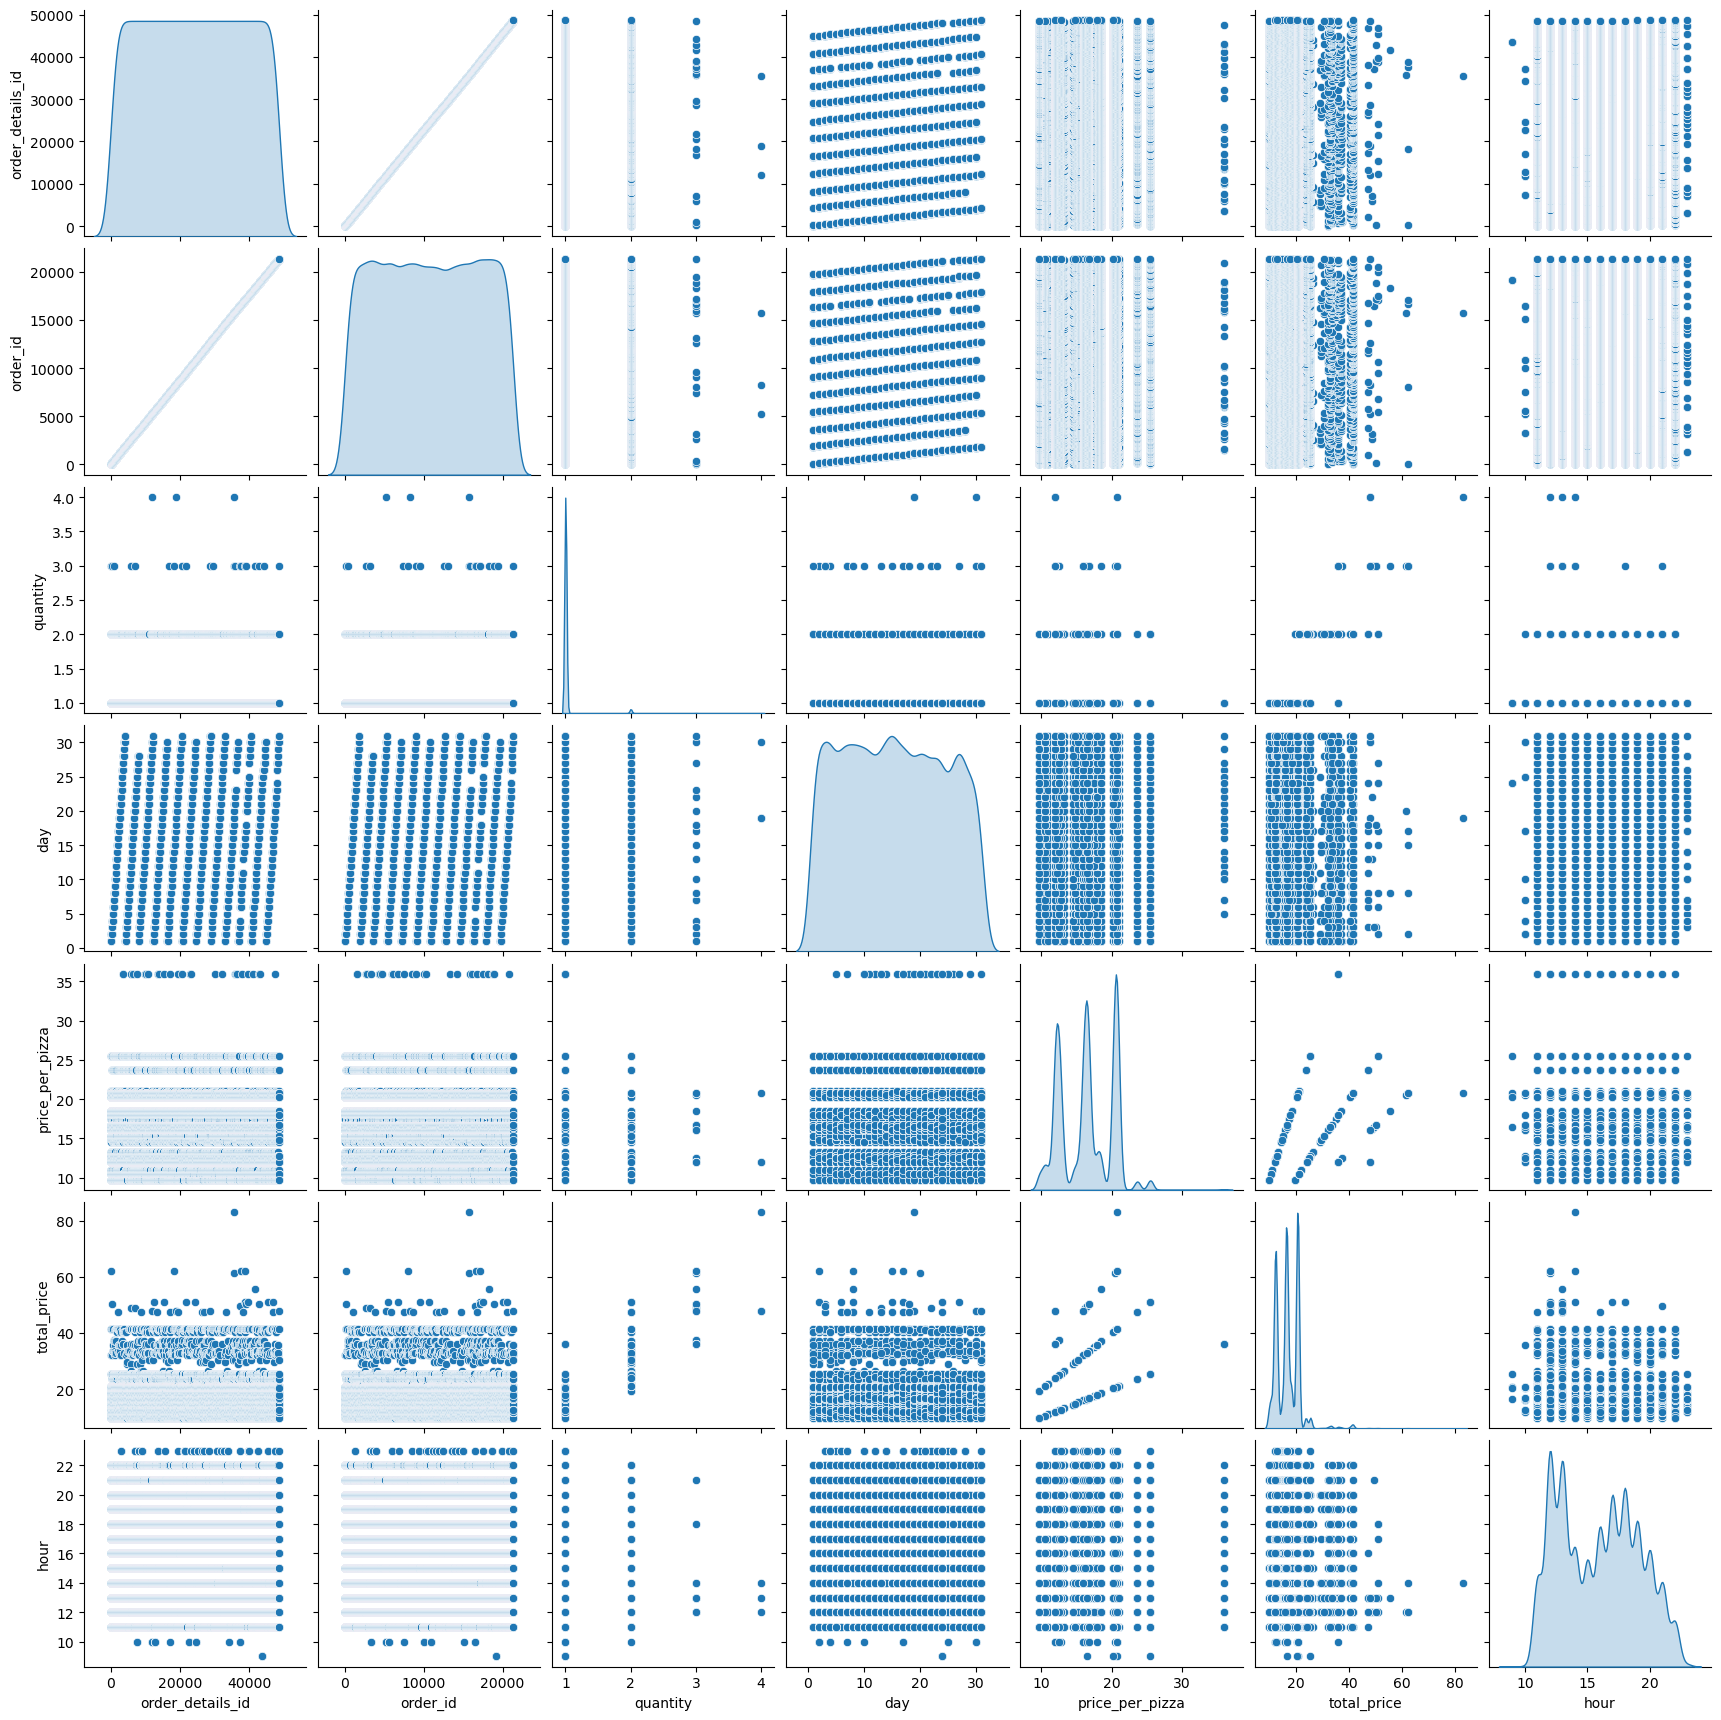

In [59]:
sns.pairplot(data = df, diag_kind = 'kde'); # This will take a short while to run

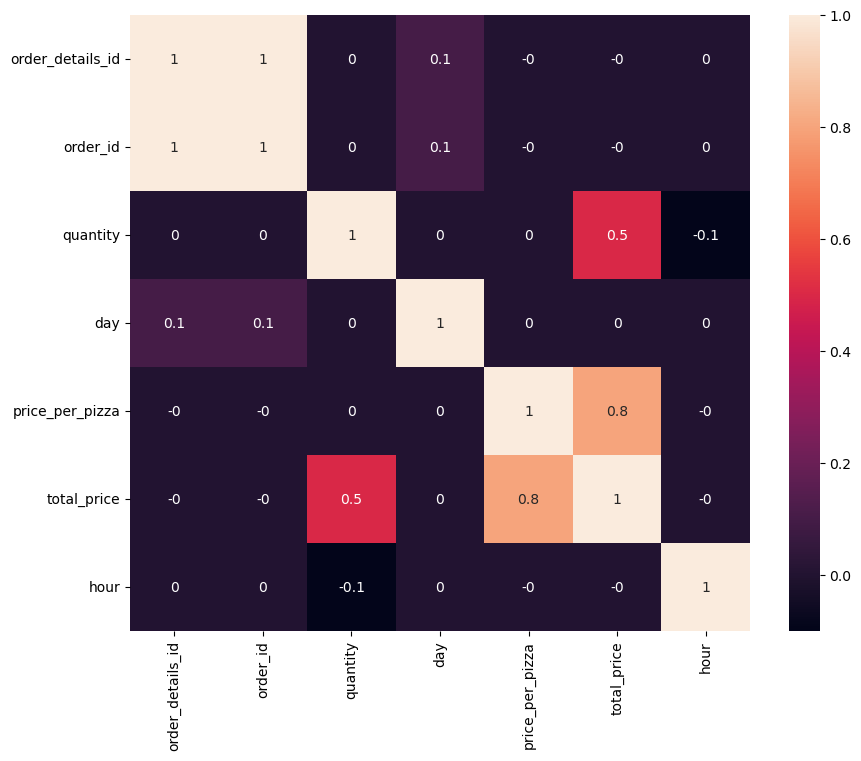

In [60]:
corr = df.corr().round(1)

plt.figure(figsize = (10,8))

sns.heatmap(corr, annot = True);

# Insights and Conclusions 🕵️‍♂️

<div class="alert alert-block alert-info">
    
* There are 4 separate datasets involved in our analysis. None of them had any missing values or duplicated rows.
* The 4 datasets were merged into one consolidated dataset, which had 48620 rows and 12 columns.
* Pizza sales ranged over a 1 year period from January to December 2015.
* We have an average of 59.64 customers each day.
* Peak restaurant hours are between 12:00 to 13:00 and between 17:00 to 19:00.
* Typically customers purchase 2.3 pizzas on average per order.
* The pizza restaurant grossed a total of 817860.05 in sales during the whole of 2015, selling a total of 49574 pizzas, with an average price of 16.50 per pizza sold.
* The average number of pizzas sold daily is 138.47 per day. The average daily revenue is 2284.53 per day.
* Friday is the busiest day of the week, with a total of 8242 pizzas sold throughout the year. An average number of 164.84 pizzas are sold on this day of the week, with average daily revenue of 2721.48.
* Alternatively Sunday is the quietest day of the week, with a total of 6035 pizzas sold throughout the year. An average number of 116.06 pizzas are sold on this day of the week, with average daily revenue of 1907.76.
* The single bestselling pizza is the big_meat_s. The single worst selling pizza is the_greek_xxl.
* L and M size pizzas are the most popular, contributing to 69.7% of all pizzas sold. Whereas XXL and XL are the least popular, contributing just 1.2% towards all pizzas sold.
* Pizzas in the "Classic" category are the most popular, with 30% of all pizzas sold belonging to this category.
* Garlic, Tomatoes, Red Onions and Red Peppers are the most commonly used ingredients.
    
</div>  